In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:

df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print("Before removing duplicates:", df.shape)

Before removing duplicates: (891, 12)


In [ ]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (891, 12)


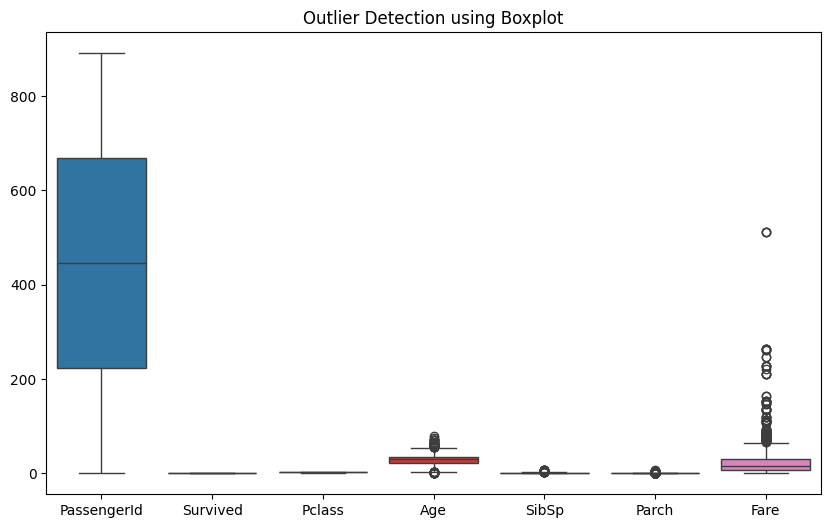

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Outlier Detection using Boxplot")
plt.show()


In [ ]:

numeric_df = df.select_dtypes(include=[np.number])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After removing outliers:", df.shape)


After removing outliers: (577, 12)


In [ ]:

df = pd.get_dummies(df, drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin",...,Cabin_E58,Cabin_E63,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F33,Cabin_F38,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,1,3,26.000000,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.000000,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.000000,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,29.699118,0,0,8.4583,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop('PassengerId', axis=1)
y = df['PassengerId']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (461, 1171)
Testing set shape: (116, 1171)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    print("\nClassification Report for:", name)
    print(classification_report(y_test, y_pred))
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n📊 FINAL MODEL PERFORMANCE\n")
display(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Classification Report for: Logistic Regression
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       0.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       0.0
          80       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       1.0
         108       0.00      0.00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Classification Report for: Decision Tree
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
         108       0.00      0.00      0.00       1.0
         110       0.00      0.00      0.00       1.0
         111       0.00      0.00      0.00       1.0
         112       0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Classification Report for: Random Forest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       0.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          67       0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.0,0.0,0.0,0.0
1,Decision Tree,0.0,0.0,0.0,0.0
2,Random Forest,0.0,0.0,0.0,0.0
3,K-Nearest Neighbors,0.0,0.0,0.0,0.0
4,Support Vector Machine,0.0,0.0,0.0,0.0


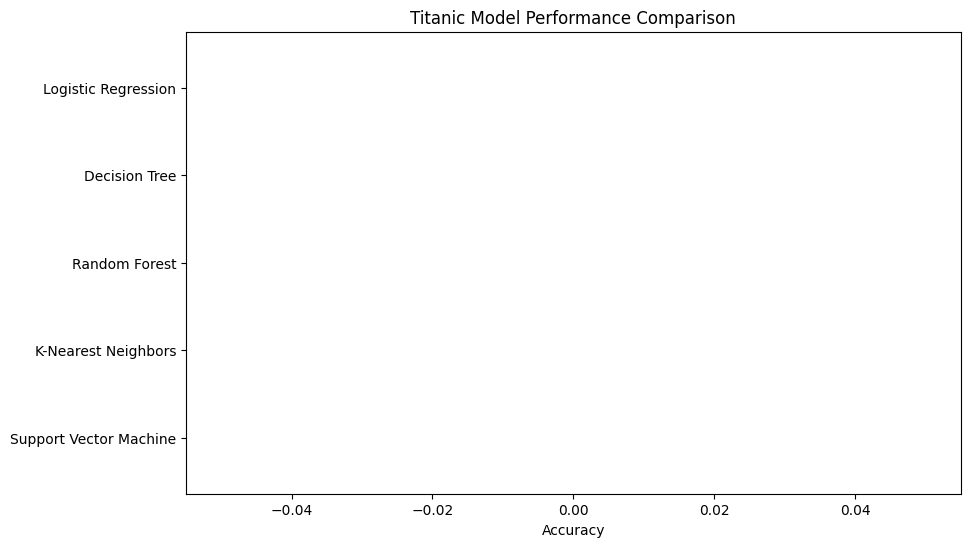

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(results_df["Model"], results_df["Accuracy"], color='green')
plt.xlabel("Accuracy")
plt.title("Titanic Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("📊 Logistic Regression Results (Titanic)")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results (Titanic)
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Detailed Classification Report:

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       0.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       0.0
          80       0.00      0.00      0.00       0.0
      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("📊 Decision Tree Results (Titanic)")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


📊 Decision Tree Results (Titanic)
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Detailed Classification Report:

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
         108       0.00      0.00      0.00       1.0
         110       0.00      0.00      0.00       1.0
         111

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("📊 Random Forest Results (Titanic)")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Results (Titanic)
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Detailed Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       0.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       0.0
          58

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("📊 K-Nearest Neighbors Results (Titanic)")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))


📊 K-Nearest Neighbors Results (Titanic)
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          58       0.00      0.00      0.00       1.0
          75       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       1.0
         108       0.00      0.00      0.00       1.0
         110       0.00      0.00      0.00       1.0
         111   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("📊 Support Vector Machine Results (Titanic)")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


📊 Support Vector Machine Results (Titanic)
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          58       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
         108       0.00      0.00      0.00       1.0
         110       0.00      0.00      0.00       1.0
         111       0.00      0.00      0.00       1.0
         113

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

📊 Titanic Model Comparison Table


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.0,0.0,0.0,0.0
1,Decision Tree,0.0,0.0,0.0,0.0
2,Random Forest,0.0,0.0,0.0,0.0
3,KNN,0.0,0.0,0.0,0.0
4,SVM,0.0,0.0,0.0,0.0


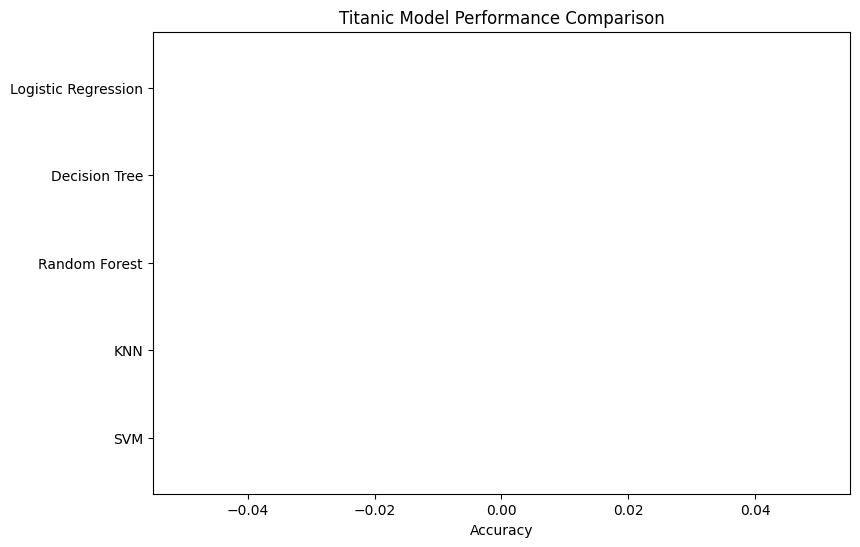

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM"],
    "Accuracy": [accuracy, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm],
    "Precision": [precision, precision_dt, precision_rf, precision_knn, precision_svm],
    "Recall": [recall, recall_dt, recall_rf, recall_knn, recall_svm],
    "F1 Score": [f1, f1_dt, f1_rf, f1_knn, f1_svm]
})

results = results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("📊 Titanic Model Comparison Table")
display(results)
plt.figure(figsize=(9,6))
plt.barh(results["Model"], results["Accuracy"])
plt.xlabel("Accuracy")
plt.title("Titanic Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()
